<a href="https://colab.research.google.com/github/samweljm/Multivaraite-analysis_factor-Analysis/blob/main/Multivaraite_Technique_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Intall kaggle
! pip install kaggle

In [2]:
#make kaggle director
! mkdir ~/.kaggle
#Copy the “kaggle.json” into this new directory
! cp kaggle.json ~/.kaggle/
#Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json
# Allocate the required permission for this file
! chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics

 89% 9.00M/10.1M [00:00<00:00, 85.0MB/s]
100% 10.1M/10.1M [00:00<00:00, 63.2MB/s]


In [4]:
!unzip "/content/us-acs-mortgage-equity-loans-rent-statistics.zip"

Archive:  /content/us-acs-mortgage-equity-loans-rent-statistics.zip
  inflating: Income_Methodology.pdf  
  inflating: real_estate_db.csv      
  inflating: real_estate_document.pdf  


In [57]:
# Importing various libraries to be used for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# real= pd.read_csv('/content/data.csv',sep=" ")
# # pool2= pd.read_csv('/content/euromillions.pool-2.features.csv')
# # rea =pd.read_csv()

#  *** Using pandas.read_csv() with space or tab as delimiters ***
real =  pd.read_csv('/content/data.csv',  sep='\s+', engine='python')


In [70]:
real.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5.0
1,13,46,1,2,1,1,US,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2.0
2,1,14,2,2,1,1,PK,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5.0
3,3,19,2,2,1,1,RO,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5.0
4,11,25,2,2,1,2,US,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3.0


In [71]:
real.shape

(19719, 57)

In [72]:
list(np.array(list(real.columns),dtype=object))

['race',
 'age',
 'engnat',
 'gender',
 'hand',
 'source',
 'country',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'E6',
 'E7',
 'E8',
 'E9',
 'E10',
 'N1',
 'N2',
 'N3',
 'N4',
 'N5',
 'N6',
 'N7',
 'N8',
 'N9',
 'N10',
 'A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9',
 'A10',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'O1',
 'O2',
 'O3',
 'O4',
 'O5',
 'O6',
 'O7',
 'O8',
 'O9',
 'O10']

In [73]:
# check null values
real.isnull().sum()

race       0
age        0
engnat     0
gender     0
hand       0
source     0
country    8
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
N1         0
N2         0
N3         0
N4         0
N5         0
N6         0
N7         0
N8         0
N9         0
N10        0
A1         0
A2         0
A3         0
A4         0
A5         0
A6         0
A7         0
A8         0
A9         0
A10        0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
C8         0
C9         0
C10        0
O1         0
O2         0
O3         0
O4         0
O5         0
O6         0
O7         0
O8         0
O9         0
O10        1
dtype: int64

In [75]:
# Drop Nan 
real.dropna()
real.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5.0
1,13,46,1,2,1,1,US,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2.0
2,1,14,2,2,1,1,PK,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5.0
3,3,19,2,2,1,1,RO,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5.0
4,11,25,2,2,1,2,US,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3.0


In [77]:
#  Drop column date since its float
real_na = real.drop(['country'],axis=1)
# pool1_da = pool1_na.drop(columns=['date','draw'], axis = 1, inplace=True)
real_na.head()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5.0
1,13,46,1,2,1,1,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2.0
2,1,14,2,2,1,1,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5.0
3,3,19,2,2,1,1,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5.0
4,11,25,2,2,1,2,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3.0


In [78]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler as SS

In [79]:
#pool1_na# Standardization
scaler = SS()
real_scaled = scaler.fit_transform(real_na)

real_new = pd.DataFrame(data=real_scaled,columns=real_na.columns)

real_new.head()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,-0.578310,-0.007122,-0.747017,-1.236038,-0.314583,-0.632857,1.112467,-0.578272,1.280081,-0.942106,1.222948,-1.170004,0.791057,-0.297125,1.364693,-1.981527,-1.729447,1.499933,-1.617932,1.837676,-1.533339,-1.499825,-1.655491,-1.335123,-1.644347,-1.396619,-0.958304,0.995272,-0.956268,0.927903,-0.145417,-0.792494,-1.025324,1.190710,0.050970,1.251756,0.619778,-1.447284,1.014054,-1.330676,1.840108,-1.374235,0.306557,-1.307673,0.622250,1.345790,0.275585,-1.012804,-1.118537,-0.972719,1.199390,-0.743816,-0.078957,-0.959594,0.881548,1.011669
1,1.909895,-0.007123,-0.747017,0.767532,-0.314583,-0.632857,-0.510253,-0.578272,-0.337006,-0.124295,-0.337106,0.440783,-1.304156,1.282124,-1.499866,1.084402,-0.964944,-0.199319,0.138171,-0.619356,0.037929,0.772208,-0.116884,-0.594719,-0.874251,0.888220,-0.958304,-0.858839,0.688303,-0.028620,1.606251,0.091997,-0.142002,-0.739941,0.050970,-0.648207,0.619778,-1.447284,-0.979976,-0.526274,0.239707,-1.374235,1.173968,-1.307673,0.622250,0.358270,-0.620122,0.749049,-1.118537,0.829502,-1.993353,1.127850,-1.161673,-1.753946,-1.153365,-2.038032
2,-1.075951,-0.007127,1.298876,0.767532,-0.314583,-0.632857,1.923828,-1.339431,-1.954092,0.693516,1.222948,-1.170004,-1.304156,1.282124,1.364693,-1.981527,1.328567,-1.898571,1.016223,1.837676,1.609197,1.529552,1.421723,1.626494,1.436036,1.649833,1.962827,-2.712950,2.332875,0.927903,-1.021251,0.976488,-1.025324,1.190710,0.972214,1.251756,0.619778,-1.447284,1.014054,-1.330676,1.840108,-1.374235,1.173968,-1.307673,1.424692,1.345790,0.275585,2.510901,0.867992,-0.972719,1.199390,-0.743816,1.003760,1.423460,0.881548,1.011669
3,-0.578310,-0.007126,1.298876,0.767532,-0.314583,-0.632857,-0.510253,1.705208,-1.145549,0.693516,-0.337106,1.246177,0.092653,0.492499,0.648553,1.084402,1.328567,0.650307,0.138171,-0.619356,0.823563,1.529552,1.421723,1.626494,0.665940,1.649833,-0.228021,0.995272,1.510589,-0.028620,0.730417,0.976488,0.741321,0.225385,0.050970,-0.648207,-0.289688,0.015466,0.017039,1.886933,-1.360694,0.769863,1.173968,1.340485,-0.982635,-0.629251,0.275585,0.749049,0.867992,-0.071608,0.135143,0.192017,1.003760,-0.959594,0.881548,1.011669
4,1.412254,-0.007126,1.298876,0.767532,-0.314583,0.031714,0.301107,-1.339431,-0.337006,-0.124295,-0.337106,-1.170004,0.092653,-1.876374,-0.067586,1.084402,-0.200440,-0.199319,-0.739881,1.018665,0.037929,0.014863,-0.116884,0.145685,-0.104156,0.888220,1.962827,0.995272,0.688303,0.927903,-1.021251,0.976488,-1.025324,1.190710,0.972214,1.251756,-0.289688,-1.447284,1.014054,0.278128,0.239707,-1.374235,-2.295677,0.457766,-0.180192,-0.629251,-0.620122,-1.012804,-3.105067,-0.972719,-0.929105,-0.743816,-1.161673,-1.753946,0.881548,-1.021465


In [80]:
# checking the number of the fields in our dataset
real_new.shape[1]

56

In [81]:
#Installing the factor analysis
!pip install factor_analyzer

In [82]:
#  import Bartlette test of spericity and kmo test to help us test the factors
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [86]:
import numpy as np
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

# #perform some calculation
# print(1/(1+np.exp(1140)))



In [87]:
chisv,p = calculate_bartlett_sphericity(real_new)
print("Bartlett sphericity test")
print("Chi Square value:",chisv)
print("p value:",p)

Bartlett sphericity test
Chi Square value: nan
p value: nan


In [ ]:
# Calculating the KMO test value
kmo_all,kmo_model = calculate_kmo(real_new)
print("KMO Test Statistic",kmo_model)

In [89]:
from factor_analyzer import FactorAnalyzer

In [90]:
# Applying facor analysis on our standardized dataset
fact = FactorAnalyzer(rotation=None,impute="drop",n_factors=real_new.shape[1])

In [91]:
#fitting data on factorizer
fact.fit(real_new)

FactorAnalyzer(impute='drop', n_factors=56, rotation=None, rotation_kwargs={})

Our dataset had had 56 field and so we fit all the fields to be our number of factor

In [92]:
# Determine the eigenvalues in the 56 factors
ev,_ = fact.get_eigenvalues()

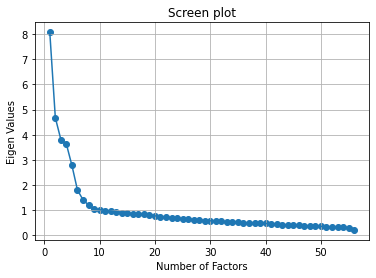

In [93]:
# Plot the eigevalues to determine the optimal number of factors
plt.scatter(range(1,real_new.shape[1]+1),ev) # scatter/dots
plt.plot(range(1,real_new.shape[1]+1),ev) # line
plt.title("Screen plot")
plt.xlabel("Number of Factors")
plt.ylabel("Eigen Values")
plt.grid()

From the above graph we can conclude the optimal number of factor to consider are 9. This is because our eigenvalue should be greater than 1

## Interpreting the factors

a. Loadings

In [95]:
fact2= FactorAnalyzer(n_factors=9,rotation='varimax')
fact2.fit(real_new)
print(pd.DataFrame(fact2.loadings_,index=real_new.columns))

               0         1         2  ...         6         7         8
race    0.001645  0.004995  0.024762  ...  0.079156  0.240824  0.027303
age     0.015013  0.008465 -0.011132  ...  0.032478 -0.005511  0.006283
engnat -0.007850  0.015313 -0.049504  ... -0.036181  0.636286  0.040310
gender  0.049926  0.216387  0.208321  ... -0.058251 -0.118425 -0.037386
hand   -0.015589 -0.010290 -0.033759  ...  0.043179 -0.081531  0.039599
source  0.062181 -0.054155  0.069944  ...  0.023540 -0.148306 -0.006234
E1      0.643993 -0.087741  0.086223  ...  0.189582  0.001130  0.066214
E2     -0.698048 -0.031987 -0.108283  ...  0.044793  0.116983  0.063307
E3      0.632315 -0.276314  0.276569  ...  0.138951 -0.008176  0.030017
E4     -0.728981  0.113184 -0.042250  ...  0.100466  0.050639  0.044444
E5      0.714597 -0.083179  0.226682  ...  0.105404 -0.043952  0.006980
E6     -0.601844  0.044842 -0.132169  ...  0.136047  0.161001  0.065631
E7      0.711562 -0.122948  0.177733  ...  0.146629 -0.070152  0

0,1,3,4,5,6,7,8,9 shows the 9 factors and how each field was classified

In [96]:
# Determining which columns were considered as factors (Eigenvalue >1 )
with np.printoptions(suppress=True,precision=9):
  print(pd.DataFrame(fact2.get_eigenvalues()[0],columns=['EigenValues']))

    EigenValues
0      8.069915
1      4.675943
2      3.811591
3      3.628380
4      2.780699
5      1.804664
6      1.419794
7      1.208194
8      1.039615
9      1.025051
10     0.988244
11     0.977220
12     0.952098
13     0.908377
14     0.878833
15     0.863794
16     0.848485
17     0.840661
18     0.817794
19     0.781410
20     0.738747
21     0.718947
22     0.702772
23     0.691035
24     0.656419
25     0.652666
26     0.623845
27     0.612523
28     0.593402
29     0.583600
30     0.571953
31     0.557560
32     0.534060
33     0.523962
34     0.522009
35     0.508911
36     0.496764
37     0.489021
38     0.483099
39     0.479412
40     0.447755
41     0.442540
42     0.434137
43     0.420631
44     0.415931
45     0.402174
46     0.395130
47     0.379168
48     0.368594
49     0.362651
50     0.346077
51     0.343542
52     0.324857
53     0.322734
54     0.311101
55     0.221510


b.Varaince

In [97]:

print(pd.DataFrame(fact2.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2  ...         6         7         8
Variance          5.019636  4.520905  3.819712  ...  1.004535  0.953410  0.667263
Proportional Var  0.089636  0.080730  0.068209  ...  0.017938  0.017025  0.011915
Cumulative Var    0.089636  0.170367  0.238576  ...  0.391158  0.408183  0.420099

[3 rows x 9 columns]


c.Cummunalities

In [99]:
print(pd.DataFrame(fact2.get_communalities(),index=real_new.columns,columns=['Communalities']))

        Communalities
race         0.135740
age          0.001653
engnat       0.420132
gender       0.128667
hand         0.016352
source       0.050896
E1           0.475359
E2           0.521322
E3           0.592415
E4           0.561992
E5           0.595713
E6           0.473843
E7           0.586700
E8           0.373440
E9           0.432689
E10          0.475369
N1           0.571923
N2           0.433579
N3           0.465022
N4           0.204844
N5           0.342762
N6           0.576772
N7           0.680855
N8           0.786103
N9           0.535317
N10          0.494817
A1           0.324295
A2           0.418142
A3           0.321100
A4           0.632513
A5           0.472289
A6           0.406863
A7           0.529593
A8           0.395438
A9           0.551634
A10          0.356425
C1           0.399575
C2           0.389759
C3           0.248389
C4           0.478108
C5           0.439034
C6           0.464242
C7           0.317772
C8           0.324094
C9        

In [100]:
with np.printoptions(suppress=True,precision=6):
  print(pd.DataFrame(fact2.get_uniquenesses(),index=real_new.columns,columns=["Uniqueness"]))

        Uniqueness
race      0.864260
age       0.998347
engnat    0.579868
gender    0.871333
hand      0.983648
source    0.949104
E1        0.524641
E2        0.478678
E3        0.407585
E4        0.438008
E5        0.404287
E6        0.526157
E7        0.413300
E8        0.626560
E9        0.567311
E10       0.524631
N1        0.428077
N2        0.566421
N3        0.534978
N4        0.795156
N5        0.657238
N6        0.423228
N7        0.319145
N8        0.213897
N9        0.464683
N10       0.505183
A1        0.675705
A2        0.581858
A3        0.678900
A4        0.367487
A5        0.527711
A6        0.593137
A7        0.470407
A8        0.604562
A9        0.448366
A10       0.643575
C1        0.600425
C2        0.610241
C3        0.751611
C4        0.521892
C5        0.560966
C6        0.535758
C7        0.682228
C8        0.675906
C9        0.581824
C10       0.693000
O1        0.452755
O2        0.542630
O3        0.564529
O4        0.654111
O5        0.522203
O6        0.

In [102]:
with np.printoptions(suppress=True,precision=6):
  print(pd.DataFrame(fact2.get_communalities(),index=real_new.columns,columns=["Communalities"]))

        Communalities
race         0.135740
age          0.001653
engnat       0.420132
gender       0.128667
hand         0.016352
source       0.050896
E1           0.475359
E2           0.521322
E3           0.592415
E4           0.561992
E5           0.595713
E6           0.473843
E7           0.586700
E8           0.373440
E9           0.432689
E10          0.475369
N1           0.571923
N2           0.433579
N3           0.465022
N4           0.204844
N5           0.342762
N6           0.576772
N7           0.680855
N8           0.786103
N9           0.535317
N10          0.494817
A1           0.324295
A2           0.418142
A3           0.321100
A4           0.632513
A5           0.472289
A6           0.406863
A7           0.529593
A8           0.395438
A9           0.551634
A10          0.356425
C1           0.399575
C2           0.389759
C3           0.248389
C4           0.478108
C5           0.439034
C6           0.464242
C7           0.317772
C8           0.324094
C9        